<a href="https://colab.research.google.com/github/Arefeh-Amidiyan/Projects/blob/main/original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, GRU, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [31]:
df = pd.read_csv('/content/social_sec_inv.csv')

In [32]:
df

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,Social Sec Inv,20241119,1130.0,1130.0,1089.0,1117.0,8.885435e+11,795159526,10041,D,1098.0,1093.0
1,Social Sec Inv,20241118,1088.0,1099.0,1076.0,1098.0,4.927284e+11,448759711,5036,D,1067.0,1099.0
2,Social Sec Inv,20241117,1078.0,1078.0,1045.0,1067.0,6.567979e+11,615636501,7106,D,1047.0,1072.0
3,Social Sec Inv,20241116,1047.0,1047.0,1042.0,1047.0,1.806666e+11,172559051,1717,D,1017.0,1047.0
4,Social Sec Inv,20241113,983.0,1022.0,983.0,1017.0,5.254508e+11,516554581,5799,D,993.0,1022.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,Social Sec Inv,20200419,9333.0,9333.0,9333.0,9027.0,4.054824e+10,4344609,2796,D,8889.0,9333.0
1101,Social Sec Inv,20200418,9030.0,9030.0,9030.0,8889.0,8.468741e+10,9378451,2122,D,8600.0,9030.0
1102,Social Sec Inv,20200415,8600.0,8600.0,8600.0,8600.0,5.761989e+13,6699987426,2061657,D,1000.0,8600.0
1103,Social Sec Inv,20200414,0.0,0.0,0.0,1000.0,0.000000e+00,0,0,D,1000.0,1000.0


In [33]:
df = df.drop(['<TICKER>'], axis=1)
df = df.rename(columns={'<DTYYYYMMDD>': 'date', '<HIGH>': 'high','<FIRST>' : 'first', '<LOW>': 'low', '<CLOSE>': 'close', '<VALUE>': 'value',
                        '<VOL>': 'vol', '<OPENINT>': 'openint','<PER>': 'per', '<OPEN>': 'open', '<LAST>': 'last'})

In [34]:
df

,date,first,high,low,close,value,vol,openint,per,open,last
0,20241119,1130.0,1130.0,1089.0,1117.0,8.885435e+11,795159526,10041,D,1098.0,1093.0
1,20241118,1088.0,1099.0,1076.0,1098.0,4.927284e+11,448759711,5036,D,1067.0,1099.0
2,20241117,1078.0,1078.0,1045.0,1067.0,6.567979e+11,615636501,7106,D,1047.0,1072.0
3,20241116,1047.0,1047.0,1042.0,1047.0,1.806666e+11,172559051,1717,D,1017.0,1047.0
4,20241113,983.0,1022.0,983.0,1017.0,5.254508e+11,516554581,5799,D,993.0,1022.0
...,...,...,...,...,...,...,...,...,...,...,...
1100,20200419,9333.0,9333.0,9333.0,9027.0,4.054824e+10,4344609,2796,D,8889.0,9333.0
1101,20200418,9030.0,9030.0,9030.0,8889.0,8.468741e+10,9378451,2122,D,8600.0,9030.0
1102,20200415,8600.0,8600.0,8600.0,8600.0,5.761989e+13,6699987426,2061657,D,1000.0,8600.0
1103,20200414,0.0,0.0,0.0,1000.0,0.000000e+00,0,0,D,1000.0,1000.0


درصد تغییرات

In [35]:
df['percentage_change'] = df['close'].pct_change() * 100
# df['percentage_change'] = ((df['last'] - df['first']) / df['first']) * 100
df['percentage_change'].iloc[0] = 0  # جایگزینی فقط برای مقدار اول

<ipython-input-35-883c31f2489b>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['percentage_change'].iloc[0] = 0  # جایگزینی فقط برای مقدار اول
<ipython-input-35-883c31f2489b>:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [36]:
df

,date,first,high,low,close,value,vol,openint,per,open,last,percentage_change
0,20241119,1130.0,1130.0,1089.0,1117.0,8.885435e+11,795159526,10041,D,1098.0,1093.0,0.000000
1,20241118,1088.0,1099.0,1076.0,1098.0,4.927284e+11,448759711,5036,D,1067.0,1099.0,-1.700985
2,20241117,1078.0,1078.0,1045.0,1067.0,6.567979e+11,615636501,7106,D,1047.0,1072.0,-2.823315
3,20241116,1047.0,1047.0,1042.0,1047.0,1.806666e+11,172559051,1717,D,1017.0,1047.0,-1.874414
4,20241113,983.0,1022.0,983.0,1017.0,5.254508e+11,516554581,5799,D,993.0,1022.0,-2.865330
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,20200419,9333.0,9333.0,9333.0,9027.0,4.054824e+10,4344609,2796,D,8889.0,9333.0,-2.610853
1101,20200418,9030.0,9030.0,9030.0,8889.0,8.468741e+10,9378451,2122,D,8600.0,9030.0,-1.528747
1102,20200415,8600.0,8600.0,8600.0,8600.0,5.761989e+13,6699987426,2061657,D,1000.0,8600.0,-3.251209
1103,20200414,0.0,0.0,0.0,1000.0,0.000000e+00,0,0,D,1000.0,1000.0,-88.372093


In [37]:
# تعداد مقادیر صفر در هر ستون
zero_counts = (df == 0).sum()
print("تعداد مقادیر صفر در هر ستون:")
print(zero_counts)

تعداد مقادیر صفر در هر ستون:
date                   0
first                141
high                 141
low                  141
close                  0
value                141
vol                  141
openint              141
per                    0
open                   0
last                   0
percentage_change    159
dtype: int64


In [38]:
columns_to_replace = ['first', 'high', 'low', 'close', 'value', 'vol', 'openint', 'percentage_change']
print(df[columns_to_replace].dtypes)

first                float64
high                 float64
low                  float64
close                float64
value                float64
vol                    int64
openint                int64
percentage_change    float64
dtype: object


In [39]:
import pandas as pd

# لیست ستون‌هایی که باید تبدیل شوند
columns_to_replace = ['first', 'high', 'low', 'close', 'value', 'vol', 'openint', 'percentage_change']

# تبدیل هر ستون به عددی و جایگزینی مقادیر غیر قابل تبدیل با NaN
for col in columns_to_replace:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # تبدیل به عددی؛ مقادیر غیر عددی به NaN تبدیل می‌شوند

# جایگزینی مقادیر صفر با NaN
df[columns_to_replace] = df[columns_to_replace].replace(0, pd.NA)

# پر کردن مقادیر NaN با میانگین هر ستون
df[columns_to_replace] = df[columns_to_replace].fillna(df[columns_to_replace].mean())

# نمایش دیتا تایپ‌های نهایی برای بررسی
print(df.dtypes)

date                   int64
first                float64
high                 float64
low                  float64
close                float64
value                float64
vol                  float64
openint              float64
per                   object
open                 float64
last                 float64
percentage_change    float64
dtype: object


<ipython-input-39-feaba1bd49ec>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_replace] = df[columns_to_replace].fillna(df[columns_to_replace].mean())


In [40]:
for col in columns_to_replace:
    print(f"Non-numeric values in column '{col}':")
    print(df[col][~df[col].apply(lambda x: isinstance(x, (int, float)))].unique())

Non-numeric values in column 'first':
[]
Non-numeric values in column 'high':
[]
Non-numeric values in column 'low':
[]
Non-numeric values in column 'close':
[]
Non-numeric values in column 'value':
[]
Non-numeric values in column 'vol':
[]
Non-numeric values in column 'openint':
[]
Non-numeric values in column 'percentage_change':
[]


In [41]:

# لیست ستون‌هایی که باید پردازش شوند
columns_to_replace = ['first', 'high', 'low', 'close', 'value', 'vol', 'openint', 'percentage_change']

# تبدیل مقادیر غیر عددی به NaN و تغییر نوع ستون‌ها به float
for col in columns_to_replace:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # مقادیر غیرقابل تبدیل به NaN تغییر می‌کنند

# جایگزینی مقادیر صفر با NaN
df[columns_to_replace] = df[columns_to_replace].replace(0, pd.NA)

# پر کردن مقادیر NaN با میانگین هر ستون
df[columns_to_replace] = df[columns_to_replace].fillna(df[columns_to_replace].mean())

# بررسی نهایی
print(df.dtypes)
print(df.head())

date                   int64
first                float64
high                 float64
low                  float64
close                float64
value                float64
vol                  float64
openint              float64
per                   object
open                 float64
last                 float64
percentage_change    float64
dtype: object
       date   first    high     low   close         value          vol  \
0  20241119  1130.0  1130.0  1089.0  1117.0  8.885435e+11  795159526.0   
1  20241118  1088.0  1099.0  1076.0  1098.0  4.927284e+11  448759711.0   
2  20241117  1078.0  1078.0  1045.0  1067.0  6.567979e+11  615636501.0   
3  20241116  1047.0  1047.0  1042.0  1047.0  1.806666e+11  172559051.0   
4  20241113   983.0  1022.0   983.0  1017.0  5.254508e+11  516554581.0   

   openint per    open    last  percentage_change  
0  10041.0   D  1098.0  1093.0           1.034332  
1   5036.0   D  1067.0  1099.0          -1.700985  
2   7106.0   D  1047.0  1072.0       

In [42]:
df

,date,first,high,low,close,value,vol,openint,per,open,last,percentage_change
0,20241119,1130.000000,1130.000000,1089.000000,1117.0,8.885435e+11,7.951595e+08,1.004100e+04,D,1098.0,1093.0,1.034332
1,20241118,1088.000000,1099.000000,1076.000000,1098.0,4.927284e+11,4.487597e+08,5.036000e+03,D,1067.0,1099.0,-1.700985
2,20241117,1078.000000,1078.000000,1045.000000,1067.0,6.567979e+11,6.156365e+08,7.106000e+03,D,1047.0,1072.0,-2.823315
3,20241116,1047.000000,1047.000000,1042.000000,1047.0,1.806666e+11,1.725591e+08,1.717000e+03,D,1017.0,1047.0,-1.874414
4,20241113,983.000000,1022.000000,983.000000,1017.0,5.254508e+11,5.165546e+08,5.799000e+03,D,993.0,1022.0,-2.865330
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,20200419,9333.000000,9333.000000,9333.000000,9027.0,4.054824e+10,4.344609e+06,2.796000e+03,D,8889.0,9333.0,-2.610853
1101,20200418,9030.000000,9030.000000,9030.000000,8889.0,8.468741e+10,9.378451e+06,2.122000e+03,D,8600.0,9030.0,-1.528747
1102,20200415,8600.000000,8600.000000,8600.000000,8600.0,5.761989e+13,6.699987e+09,2.061657e+06,D,1000.0,8600.0,-3.251209
1103,20200414,7338.006224,7482.034232,7181.318465,1000.0,1.574162e+12,4.546002e+08,2.207168e+04,D,1000.0,1000.0,-88.372093


شمردن داپلیکیت ها

In [43]:
total_duplicates = df.duplicated().sum()
print(f'Total number of duplicates are {total_duplicates}')

Total number of duplicates are 0


جمع خالی ها

In [44]:
df.isnull().sum()

,0
date,0
first,0
high,0
low,0
close,0
value,0
vol,0
openint,0
per,0
open,0


In [45]:
# Converting 'Volume' from strings with 'M' and 'B' to numerical values
df['vol'] = df['vol'].replace({'M': '*1e6', 'B': '*1e9'}, regex=True).map(pd.eval).astype(float)

In [46]:
# تبدیل تاریخ به فرمت datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

missing_values

In [47]:
# Checking for any missing values in the dataset
missing_values = df.isnull().sum()
missing_values

,0
date,0
first,0
high,0
low,0
close,0
value,0
vol,0
openint,0
per,0
open,0


پلات توزیع درصد تغییرات

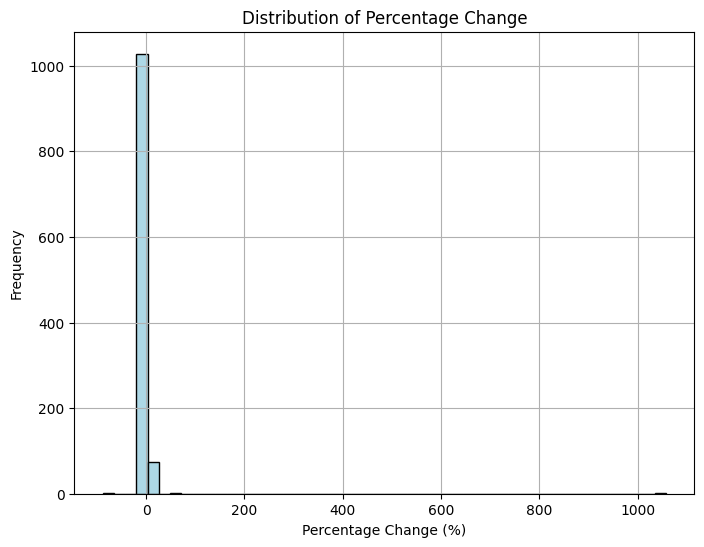

In [48]:
# Plotting the distribution of percentage change
plt.figure(figsize=(8,6))
plt.hist(df['percentage_change'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribution of Percentage Change')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

heatmap

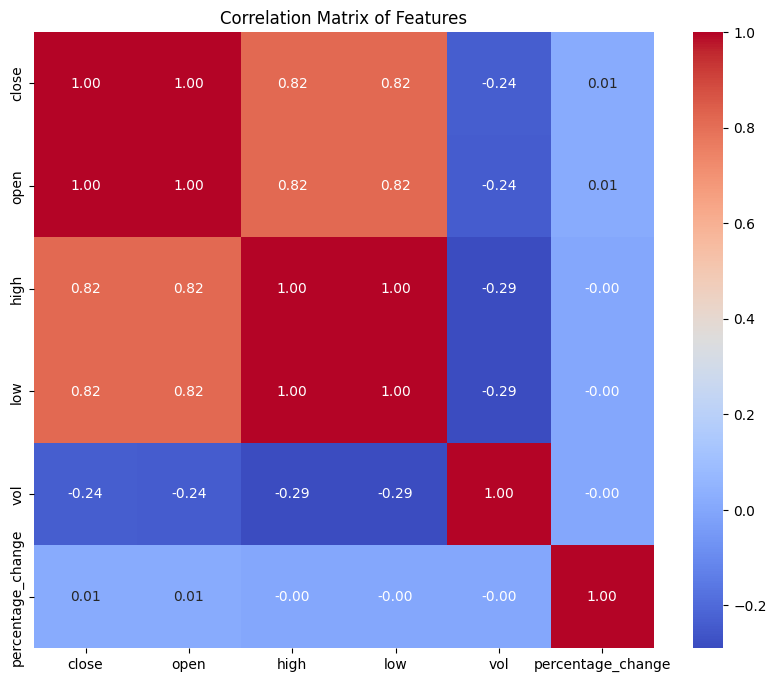

In [49]:
import seaborn as sns

# Correlation matrix to analyze relationships between features
correlation_matrix = df[['close', 'open', 'high', 'low', 'vol', 'percentage_change']].corr()

# Plotting the correlation matrix with values
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

تجزیه و تحلیل روند و فصلی بودن داده‌های قیمت بسته شدن



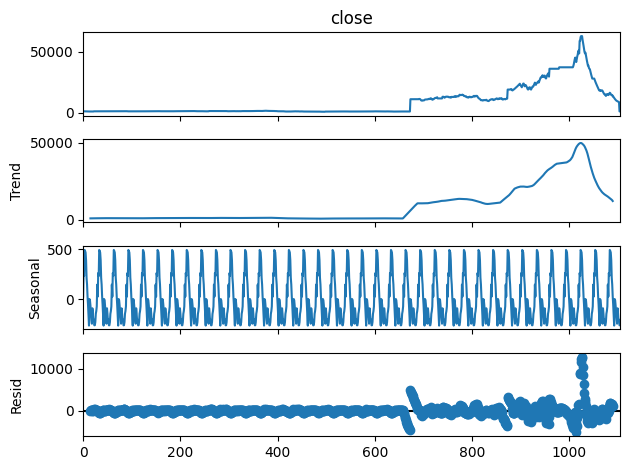

In [50]:
# Trend and Seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the Closing Price
decomposition = seasonal_decompose(df['close'], model='additive', period=30)  # assuming monthly seasonality

fig = decomposition.plot()
plt.show()

شناخت داده های پرت

In [51]:
# Outlier Detection using Z-Score
from scipy import stats

z_scores = np.abs(stats.zscore(df['close']))
threshold = 3
outliers = np.where(z_scores > threshold)
print(f"Number of outliers in Closing Price: {len(outliers[0])}")

Number of outliers in Closing Price: 19


دوبار اجرا بشه

In [80]:
# محاسبه میانه قیمت بسته شدن
median_close = df['close'].median()

# جایگزینی داده‌های پرت با میانه
df['close'] = np.where(np.abs(stats.zscore(df['close'])) > 3, median_close, df['close'])


# محاسبه میانه قیمت بسته شدن
#median_close = df['close'].median()

# # جایگزینی داده‌های پرت با میانه
#df['close'] = np.where(np.abs(stats.zscore(df['close'])) > 3, median_close, df['close'])

In [81]:
# دوباره محاسبه Z-Score برای بررسی
z_scores_updated = np.abs(stats.zscore(df['close']))
outliers_updated = np.where(z_scores_updated > threshold)

print(f"Number of outliers after replacement: {len(outliers_updated[0])}")

Number of outliers after replacement: 0


### Scaling

In [82]:
features_to_scale = ['close', 'open', 'high', 'low', 'vol']

scaler = MinMaxScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df[['date', 'close', 'open', 'high', 'low', 'vol']].head()

,date,close,open,high,low,vol
0,2024-11-19,0.024254,0.005797,0.005566,0.005671,0.110584
1,2024-11-18,0.023035,0.005296,0.005090,0.005452,0.062145
2,2024-11-17,0.021046,0.004973,0.004767,0.004929,0.085480
3,2024-11-16,0.019763,0.004489,0.004290,0.004878,0.023522
4,2024-11-13,0.017838,0.004101,0.003906,0.003882,0.071625


In [83]:
# میانگین قیمت بسته برا ی ده روز گذشته
df['MA10'] = df['close'].rolling(window=10).mean()

# میانگین قیمت بسته برا ی پنجاه روز گذشته
df['MA50'] = df['close'].rolling(window=50).mean()

# Lag Features
for lag in range(1, 6):
    df[f'Lag_{lag}'] = df['close'].shift(lag)

# Volatility (Standard Deviation)
df['Volatility'] = df['close'].rolling(window=10).std()

# Drop rows with NaN values generated by feature engineering
df.dropna(inplace=True)

print(df.head())

         date   first      high       low     close         value       vol  \
49 2024-09-10  1130.0  0.005690  0.006178  0.024703  2.343814e+11  0.028545   
50 2024-09-09  1118.0  0.005751  0.006161  0.025088  2.230194e+11  0.027001   
51 2024-09-08  1120.0  0.005720  0.005958  0.024382  2.198277e+11  0.026862   
52 2024-09-07  1148.0  0.005874  0.006194  0.025281  2.063529e+11  0.024866   
53 2024-09-03  1144.0  0.006028  0.006515  0.025987  6.738919e+11  0.081776   

    openint per      open    last  percentage_change      MA10      MA50  \
49   3703.0   D  0.006313  1125.0          -1.056338  0.025794  0.020416   
50   3201.0   D  0.006136  1133.0           0.533808  0.025467  0.020432   
51   3580.0   D  0.006362  1117.0          -0.973451  0.025255  0.020459   
52   3403.0   D  0.006540  1126.0           1.251117  0.025204  0.020544   
53   7254.0   D  0.006830  1139.0           0.970874  0.025152  0.020669   

       Lag_1     Lag_2     Lag_3     Lag_4     Lag_5  Volatility  
4

### Model selection

In [84]:
# Sort the data by 'Date' in ascending order
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date').reset_index(drop=False)

df.reset_index(inplace= True)
df.drop(columns = ['index'], inplace= True)
df

,level_0,date,first,high,low,close,value,vol,openint,per,...,last,percentage_change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,0,2020-04-13,7338.006224,0.103242,0.108500,0.016747,1.574162e+12,0.062962,2.207168e+04,D,...,1000.0,1.034332,0.449836,0.537100,0.016747,0.504395,0.522939,0.531793,0.547321,0.230964
1,1,2020-04-14,7338.006224,0.103242,0.108500,0.016747,1.574162e+12,0.062962,2.207168e+04,D,...,1000.0,-88.372093,0.513526,0.537437,0.504395,0.522939,0.531793,0.547321,0.561052,0.180588
2,2,2020-04-15,8600.000000,0.120433,0.132446,0.504395,5.761989e+13,0.936288,2.061657e+06,D,...,8600.0,-3.251209,0.580719,0.537775,0.522939,0.531793,0.547321,0.561052,0.576388,0.059857
3,3,2020-04-18,9030.000000,0.127045,0.139703,0.522939,8.468741e+10,0.000704,2.122000e+03,D,...,9030.0,-1.528747,0.602733,0.528359,0.531793,0.547321,0.561052,0.576388,0.595958,0.068524
4,4,2020-04-19,9333.000000,0.131704,0.144817,0.531793,4.054824e+10,0.000000,2.796000e+03,D,...,9333.0,-2.610853,0.626776,0.518573,0.547321,0.561052,0.576388,0.595958,0.625024,0.078820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,1051,2024-09-03,1144.000000,0.006028,0.006515,0.025987,6.738919e+11,0.081776,7.254000e+03,D,...,1139.0,0.970874,0.025152,0.020669,0.025281,0.024382,0.025088,0.024703,0.025473,0.000590
1052,1052,2024-09-07,1148.000000,0.005874,0.006194,0.025281,2.063529e+11,0.024866,3.403000e+03,D,...,1126.0,1.251117,0.025204,0.020544,0.024382,0.025088,0.024703,0.025473,0.025088,0.000686
1053,1053,2024-09-08,1120.000000,0.005720,0.005958,0.024382,2.198277e+11,0.026862,3.580000e+03,D,...,1117.0,-0.973451,0.025255,0.020459,0.025088,0.024703,0.025473,0.025088,0.024703,0.000711
1054,1054,2024-09-09,1118.000000,0.005751,0.006161,0.025088,2.230194e+11,0.027001,3.201000e+03,D,...,1133.0,0.533808,0.025467,0.020432,0.024703,0.025473,0.025088,0.024703,0.024639,0.000737


Now the data is in ascending order according to the dates. We can go forward with model selection and training.

In [85]:
df.drop(columns=['level_0'], inplace=True)
df

,date,first,high,low,close,value,vol,openint,per,open,last,percentage_change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,2020-04-13,7338.006224,0.103242,0.108500,0.016747,1.574162e+12,0.062962,2.207168e+04,D,0.004214,1000.0,1.034332,0.449836,0.537100,0.016747,0.504395,0.522939,0.531793,0.547321,0.230964
1,2020-04-14,7338.006224,0.103242,0.108500,0.016747,1.574162e+12,0.062962,2.207168e+04,D,0.004214,1000.0,-88.372093,0.513526,0.537437,0.504395,0.522939,0.531793,0.547321,0.561052,0.180588
2,2020-04-15,8600.000000,0.120433,0.132446,0.504395,5.761989e+13,0.936288,2.061657e+06,D,0.004214,8600.0,-3.251209,0.580719,0.537775,0.522939,0.531793,0.547321,0.561052,0.576388,0.059857
3,2020-04-18,9030.000000,0.127045,0.139703,0.522939,8.468741e+10,0.000704,2.122000e+03,D,0.126932,9030.0,-1.528747,0.602733,0.528359,0.531793,0.547321,0.561052,0.576388,0.595958,0.068524
4,2020-04-19,9333.000000,0.131704,0.144817,0.531793,4.054824e+10,0.000000,2.796000e+03,D,0.131598,9333.0,-2.610853,0.626776,0.518573,0.547321,0.561052,0.576388,0.595958,0.625024,0.078820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,2024-09-03,1144.000000,0.006028,0.006515,0.025987,6.738919e+11,0.081776,7.254000e+03,D,0.006830,1139.0,0.970874,0.025152,0.020669,0.025281,0.024382,0.025088,0.024703,0.025473,0.000590
1052,2024-09-07,1148.000000,0.005874,0.006194,0.025281,2.063529e+11,0.024866,3.403000e+03,D,0.006540,1126.0,1.251117,0.025204,0.020544,0.024382,0.025088,0.024703,0.025473,0.025088,0.000686
1053,2024-09-08,1120.000000,0.005720,0.005958,0.024382,2.198277e+11,0.026862,3.580000e+03,D,0.006362,1117.0,-0.973451,0.025255,0.020459,0.025088,0.024703,0.025473,0.025088,0.024703,0.000711
1054,2024-09-09,1118.000000,0.005751,0.006161,0.025088,2.230194e+11,0.027001,3.201000e+03,D,0.006136,1133.0,0.533808,0.025467,0.020432,0.024703,0.025473,0.025088,0.024703,0.024639,0.000737


### Model Selection

In [86]:
stock_data = df

In [87]:
# اجرا روی ستون کلوز
adf_result = adfuller(stock_data['close'])

# Extract the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

adf_statistic, p_value, critical_values

(-2.4889297712772316,
 0.11819111782768371,
 {'1%': -3.4365635376940706,
  '5%': -2.86428345899922,
  '10%': -2.5682307228049686})

### ADF Test Results

#### ADF Statistic
- **Value**: -3.63

#### p-value
- **Value**: 0.0052

#### Critical Values
- **1%**: -3.43  
- **5%**: -2.86  
- **10%**: -2.57

### Interpretation
Since the ADF Statistic (-3.63) is lower than the critical values at all levels (1%, 5%, and 10%), and the p-value (0.0052) is less than 0.05, we can reject the null hypothesis of the ADF test.

### Conclusion
The data is stationary, which is a good sign for proceeding with an ARIMA model.


In [88]:
df

,date,first,high,low,close,value,vol,openint,per,open,last,percentage_change,MA10,MA50,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volatility
0,2020-04-13,7338.006224,0.103242,0.108500,0.016747,1.574162e+12,0.062962,2.207168e+04,D,0.004214,1000.0,1.034332,0.449836,0.537100,0.016747,0.504395,0.522939,0.531793,0.547321,0.230964
1,2020-04-14,7338.006224,0.103242,0.108500,0.016747,1.574162e+12,0.062962,2.207168e+04,D,0.004214,1000.0,-88.372093,0.513526,0.537437,0.504395,0.522939,0.531793,0.547321,0.561052,0.180588
2,2020-04-15,8600.000000,0.120433,0.132446,0.504395,5.761989e+13,0.936288,2.061657e+06,D,0.004214,8600.0,-3.251209,0.580719,0.537775,0.522939,0.531793,0.547321,0.561052,0.576388,0.059857
3,2020-04-18,9030.000000,0.127045,0.139703,0.522939,8.468741e+10,0.000704,2.122000e+03,D,0.126932,9030.0,-1.528747,0.602733,0.528359,0.531793,0.547321,0.561052,0.576388,0.595958,0.068524
4,2020-04-19,9333.000000,0.131704,0.144817,0.531793,4.054824e+10,0.000000,2.796000e+03,D,0.131598,9333.0,-2.610853,0.626776,0.518573,0.547321,0.561052,0.576388,0.595958,0.625024,0.078820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,2024-09-03,1144.000000,0.006028,0.006515,0.025987,6.738919e+11,0.081776,7.254000e+03,D,0.006830,1139.0,0.970874,0.025152,0.020669,0.025281,0.024382,0.025088,0.024703,0.025473,0.000590
1052,2024-09-07,1148.000000,0.005874,0.006194,0.025281,2.063529e+11,0.024866,3.403000e+03,D,0.006540,1126.0,1.251117,0.025204,0.020544,0.024382,0.025088,0.024703,0.025473,0.025088,0.000686
1053,2024-09-08,1120.000000,0.005720,0.005958,0.024382,2.198277e+11,0.026862,3.580000e+03,D,0.006362,1117.0,-0.973451,0.025255,0.020459,0.025088,0.024703,0.025473,0.025088,0.024703,0.000711
1054,2024-09-09,1118.000000,0.005751,0.006161,0.025088,2.230194e+11,0.027001,3.201000e+03,D,0.006136,1133.0,0.533808,0.025467,0.020432,0.024703,0.025473,0.025088,0.024703,0.024639,0.000737


In [89]:
from statsmodels.tsa.stattools import adfuller

stock_data = df
result = adfuller(stock_data['close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.4889297712772316
p-value: 0.11819111782768371


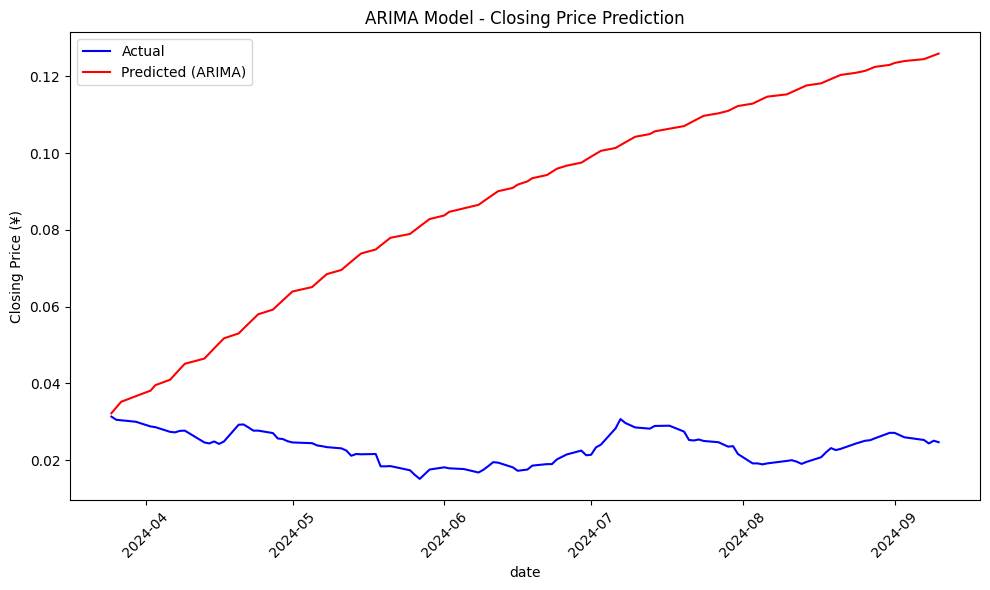

(0.0049605956716922105, 0.06443758331622655, -300.06082636673324)

In [90]:
from statsmodels.tsa.arima.model import ARIMA



# Split the data into training and testing sets
train_size = int(len(stock_data) * 0.9)
train_data, test_data = stock_data['close'][:train_size], stock_data['close'][train_size:]

# Fit ARIMA model (initial parameters for p, d, q can be refined later)
model_arima = ARIMA(train_data, order=(5, 0, 0))  # Initial ARIMA(5,1,0) model
arima_fit = model_arima.fit()

# Make predictions
arima_predictions = arima_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics
mse_arima = mean_squared_error(test_data, arima_predictions)
mae_arima = mean_absolute_error(test_data, arima_predictions)
rsq_arima = 1 - (sum((test_data - arima_predictions)**2) / sum((test_data - np.mean(test_data))**2))

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['date'][train_size:], arima_predictions, label='Predicted (ARIMA)', color='red')
plt.title('ARIMA Model - Closing Price Prediction')
plt.xlabel('date')
plt.ylabel('Closing Price (¥)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mse_arima, mae_arima, rsq_arima

Simple ARIMA doesn't give correct output as we only predict using single variable closing price.

Now when we try using other features including Volume, Moving Average and Volatility, it gives us better predictions.  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 0.000, MAE: 0.007, R-Squared: -2.451


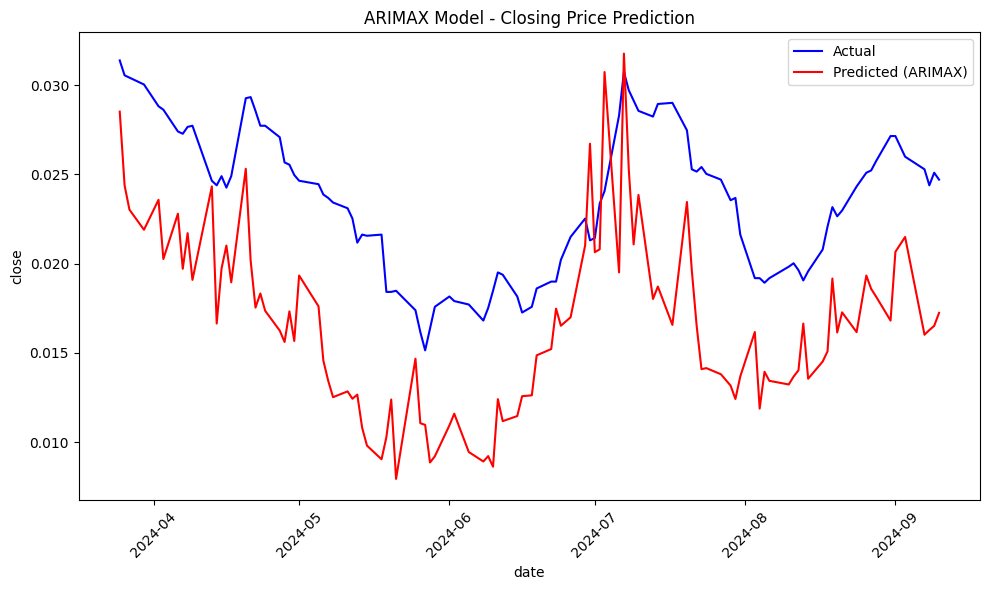

In [91]:
from statsmodels.tsa.arima.model import ARIMA

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(stock_data) * 0.9)
train_data, test_data = df['close'][:train_size], df['close'][train_size:]

# Define exogenous variables (for example: Volume, MA10, Volatility)
exog_train = df[['vol', 'MA10', 'Volatility']][:train_size]
exog_test = df[['vol', 'MA10', 'Volatility']][train_size:]

# Fit ARIMAX model
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)
rsq_arimax = 1 - (sum((test_data - arimax_predictions)**2) / sum((test_data - np.mean(test_data))**2))

print(f'MSE: {mse_arimax:.3f}, MAE: {mae_arimax:.3f}, R-Squared: {rsq_arimax:.3f}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(df['date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(df['date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that ARIMA with other features gave us good results. But We can't take Volume and Variability features, as they won't be available to us during predictions.

Hence we try to do predictions using Lag.

MSE: 0.0000, MAE: 0.0020, R-Squared: 0.6814


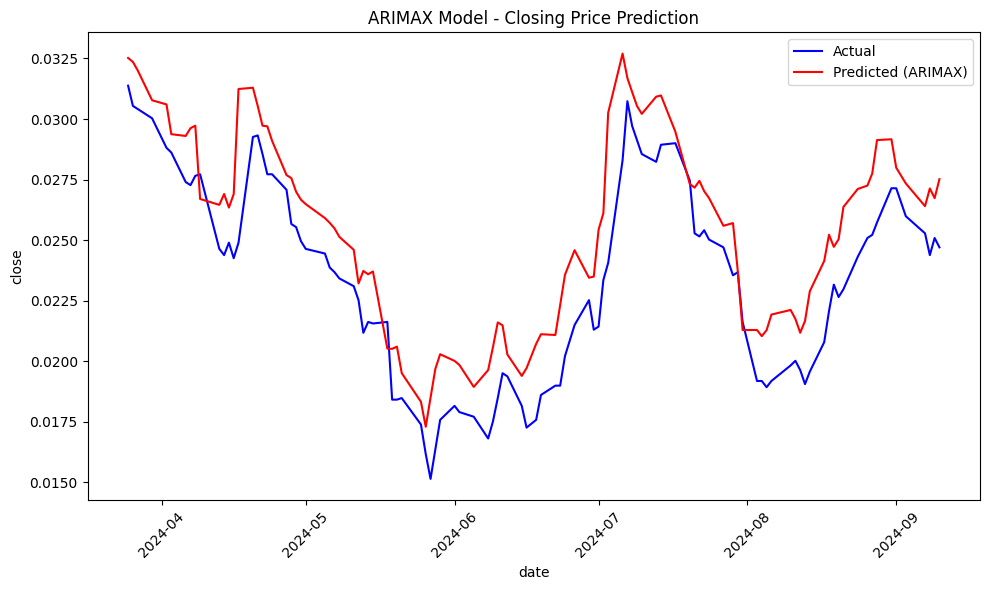

In [92]:
from statsmodels.tsa.arima.model import ARIMA

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(df) * 0.9)
train_data, test_data = df['close'][:train_size], df['close'][train_size:]

# Use lag features (e.g., Lag_1, Lag_2, ..., Lag_5) instead of moving averages and volatility
exog_train = df[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][:train_size]
exog_test = df[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']][train_size:]

# Fit ARIMAX model with lagged features as exogenous variables
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)
rsq_arimax = 1 - (sum((test_data - arimax_predictions)**2) / sum((test_data - np.mean(test_data))**2))

print(f'MSE: {mse_arimax:.4f}, MAE: {mae_arimax:.4f}, R-Squared: {rsq_arimax:.4f}')

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(stock_data['date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(stock_data['date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('date')
plt.ylabel('close')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### LSTM

In [ ]:
# Prepare the data for LSTM
def create_dataset(data, time_step=10):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

# Scaling the 'Closing Price' column between 0 and 1 for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1,1))

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.9)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create the LSTM input dataset
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

# Compile and train the LSTM model
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, Y_train, epochs=400, batch_size=32, verbose=1)

# Predict on test data
lstm_predictions = model_lstm.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Inverse scaling for actual test values
Y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate evaluation metrics for LSTM
mse_lstm = mean_squared_error(Y_test_scaled, lstm_predictions)
mae_lstm = mean_absolute_error(Y_test_scaled, lstm_predictions)

ss_res = np.sum((Y_test_scaled - lstm_predictions) ** 2)
ss_tot = np.sum((Y_test_scaled - np.mean(Y_test_scaled)) ** 2)
rsq_lstm = 1 - (ss_res / ss_tot)


# Plot the LSTM results
plt.figure(figsize=(10,6))
plt.plot(df['date'][train_size+time_step:], Y_test_scaled, label='Actual', color='blue')
plt.plot(df['date'][train_size+time_step:], lstm_predictions, label='Predicted (LSTM)', color='red')
plt.title('LSTM Model - Closing Price Prediction')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"MSE (LSTM): {mse_lstm:.5f}")
print(f"MAE (LSTM): {mae_lstm:.5f}")
print(f"R-Squared (LSTM): {rsq_lstm:.5f}")

### GRU

<ipython-input-93-27c681690f43>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # پر کردن مقادیر خالی
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0537 - val_loss: 4.5885e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0070 - val_loss: 3.8581e-05
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0053 - val_loss: 2.6104e-05
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0050 - val_loss: 4.7535e-05
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0058 - val_loss: 7.1395e-05
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0033 - val_loss: 2.6612e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0053 - val_loss: 3.8988e-06
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0028 - val_loss: 4.9428e-06
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0040 - val_loss: 8.8976e-06
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0031 - val_loss: 1.1885e-04
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0025 - val_loss: 8.7838e-06
Epoch 12/50
22

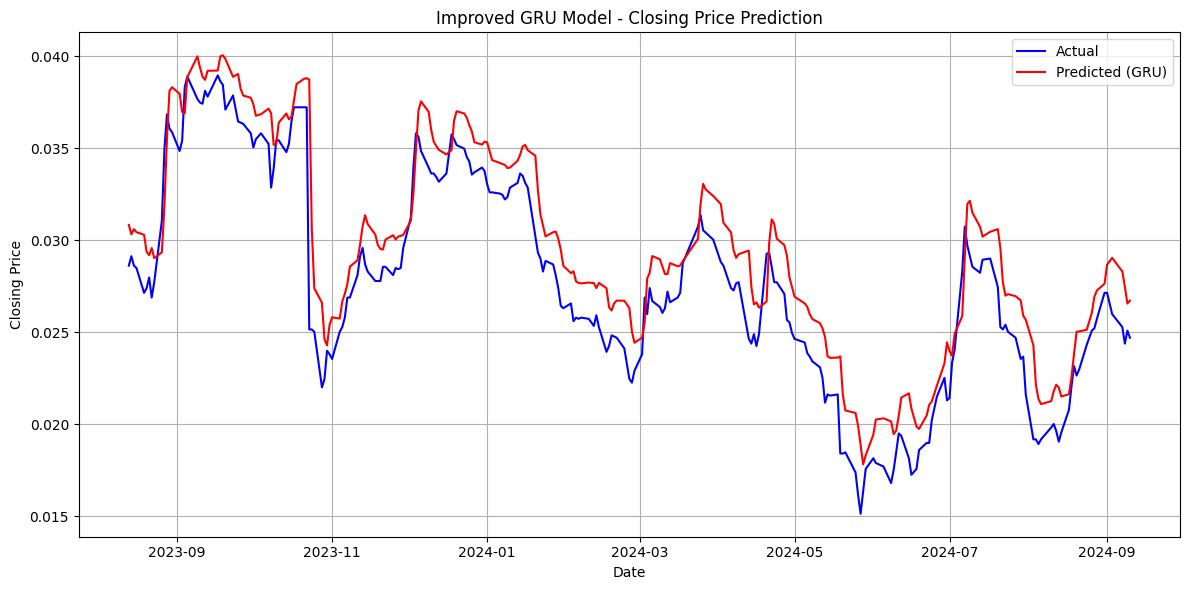

In [93]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt

# اطمینان از وجود ستون‌های لازم
if 'date' not in df.columns or 'close' not in df.columns:
    raise ValueError("Ensure 'date' and 'close' columns exist in your dataset.")

# افزودن ویژگی‌های جدید به داده
df['sma_10'] = df['close'].rolling(window=10).mean()  # میانگین متحرک 10 روزه
df['volatility'] = df['close'].rolling(window=10).std()  # نوسانات 10 روزه
df.fillna(method='bfill', inplace=True)  # پر کردن مقادیر خالی

# مقیاس‌بندی داده‌ها بین 0 و 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['close', 'sma_10', 'volatility']].values)

# تقسیم داده‌ها به مجموعه‌های آموزشی و تست
train_size = int(len(scaled_data) * 0.7)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# تابع ساخت دیتاست برای GRU
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, :])  # تمام ویژگی‌ها
        Y.append(data[i, 0])  # قیمت بسته شدن به‌عنوان خروجی
    return np.array(X), np.array(Y)

# ساخت دیتاست
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# تغییر شکل داده‌ها به [نمونه‌ها، زمان، ویژگی‌ها]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# تعریف مدل GRU با Dropout
model_gru = Sequential([
    GRU(units=100, return_sequences=True, input_shape=(time_step, X_train.shape[2])),
    Dropout(0.2),
    GRU(units=50),
    Dropout(0.2),
    Dense(units=1)  # خروجی قیمت بسته شدن
])

# کامپایل و آموزش مدل
model_gru.compile(optimizer='adam', loss='mean_squared_error')
history = model_gru.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# پیش‌بینی روی داده‌های تست
gru_predictions = model_gru.predict(X_test)

# برگشت مقیاس‌بندی برای پیش‌بینی‌ها
gru_predictions_full = np.hstack((gru_predictions, np.zeros((gru_predictions.shape[0], 2))))
gru_predictions = scaler.inverse_transform(gru_predictions_full)[:, 0]

# برگشت مقیاس‌بندی برای داده‌های واقعی
Y_test_full = np.hstack((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], 2))))
Y_test_scaled = scaler.inverse_transform(Y_test_full)[:, 0]

# محاسبه معیارهای ارزیابی
mse_gru = mean_squared_error(Y_test_scaled, gru_predictions)
mae_gru = mean_absolute_error(Y_test_scaled, gru_predictions)
print(f"MSE (GRU): {mse_gru:.5f}")
print(f"MAE (GRU): {mae_gru:.5f}")

# رسم نمودار نتایج
plt.figure(figsize=(12, 6))
plt.plot(df['date'][train_size+time_step:], Y_test_scaled, label='Actual', color='blue')
plt.plot(df['date'][train_size+time_step:], gru_predictions, label='Predicted (GRU)', color='red')
plt.title('Improved GRU Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()